<a href="https://colab.research.google.com/github/mvuddandi/ML-StatModels/blob/main/Linear_regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/mvuddandi/ML-StatModels.git


Cloning into 'ML-StatModels'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 21 (delta 6), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (21/21), 51.51 KiB | 10.30 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [2]:
%cd ML-StatModels


/content/ML-StatModels


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


In [ ]:
df = pd.read_csv("prices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


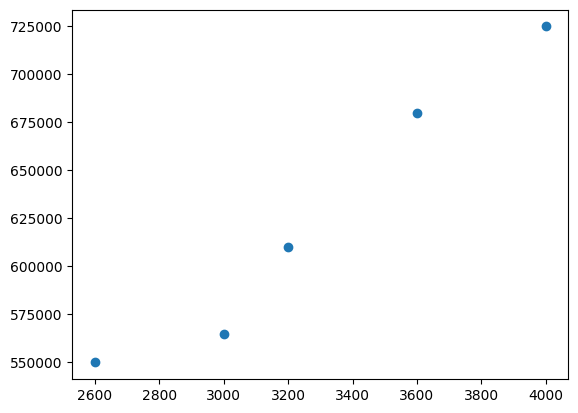

In [ ]:
plt.scatter(df['area'],df['price'])
plt.show()

In [ ]:
model = linear_model.LinearRegression()

In [ ]:
X = df[['area']]
y = df['price']

model.fit(X,y)


LinearRegression()

In [ ]:
pred = model.predict(np.array([[3100]]))

pred

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([601558.21917808])

In [ ]:
model.coef_

array([135.78767123])

In [ ]:
model.intercept_

np.float64(180616.43835616432)

In [ ]:
df_cpci  = pd.read_csv("canada_per_capita_income.csv")

In [ ]:
df_cpci.head(10)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


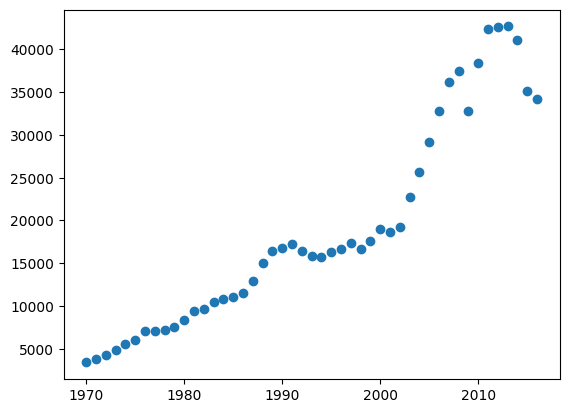

In [ ]:
plt.scatter(df_cpci['year'],df_cpci['per capita income (US$)'])
plt.show()

In [ ]:
model1 = linear_model.LinearRegression()

In [ ]:
df_cpci.columns

Index(['year', 'per capita income (US$)'], dtype='object')

In [ ]:
X = df_cpci[['year']]
y = df_cpci['per capita income (US$)']

model1.fit(X, y)


LinearRegression()

In [ ]:
model1.predict([[2023]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([43774.08932009])

In [32]:
df_mvhd = pd.read_csv("hiring.csv")

In [33]:
df_mvhd.info()
df_mvhd

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  6 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 388.0+ bytes


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [34]:
df_mvhd['experience'] = df_mvhd['experience'].fillna('Zero')

In [35]:
df_mvhd

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,Zero,8.0,9,50000
1,Zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [36]:
!pip install word2number

from word2number import w2n



In [37]:
df_mvhd['experience_num'] = df_mvhd['experience'].apply(
    lambda x: w2n.word_to_num(x) if isinstance(x, str) else None
)

In [38]:
df_mvhd

,experience,test_score(out of 10),interview_score(out of 10),salary($),experience_num
0,Zero,8.0,9,50000,0
1,Zero,8.0,6,45000,0
2,five,6.0,7,60000,5
3,two,10.0,10,65000,2
4,seven,9.0,6,70000,7
5,three,7.0,10,62000,3
6,ten,NaN,7,72000,10
7,eleven,7.0,8,80000,11


In [39]:
med_tc = np.mean(df_mvhd['test_score(out of 10)'])
med_tc

np.float64(7.857142857142857)

In [40]:
df_mvhd['test_score(out of 10)'] = df_mvhd['test_score(out of 10)'].fillna(med_tc)

In [41]:
df_mvhd

,experience,test_score(out of 10),interview_score(out of 10),salary($),experience_num
0,Zero,8.000000,9,50000,0
1,Zero,8.000000,6,45000,0
2,five,6.000000,7,60000,5
3,two,10.000000,10,65000,2
4,seven,9.000000,6,70000,7
5,three,7.000000,10,62000,3
6,ten,7.857143,7,72000,10
7,eleven,7.000000,8,80000,11


In [42]:
mvmodel = linear_model.LinearRegression()

In [45]:
mvmodel.fit (df_mvhd[['experience_num','test_score(out of 10)','interview_score(out of 10)']],df_mvhd['salary($)'])

LinearRegression()

In [47]:
mvmodel.coef_

array([2827.63404314, 1912.93803053, 2196.9753141 ])

In [48]:
mvmodel.intercept_

np.float64(17237.330313727172)

In [52]:
mvmodel.predict([[12,7,9]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([84332.28287213])